<a href="https://colab.research.google.com/github/NishthaJethani/traffic-sign-detection-recognition/blob/main/traffic_sign_detection_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/drive')

kaggle_api_key = "/content/drive/My Drive/kaggle.json"

Mounted at /content/drive


In [4]:
import kaggle

kaggle_dataset_name = "sarangdilipjodh/indian-traffic-signs-prediction85-classes"

# Replace 'destination_directory' with the desired destination within your Colab environment
destination_directory = "/content/dataset/"

# Use the Kaggle API to load the dataset without downloading it
kaggle.api.dataset_download_files(kaggle_dataset_name, path=destination_directory, unzip=True)

In [5]:
import os

extracted_files=os.listdir("/content/dataset/traffic_sign_classification_dataset")
print(extracted_files)

['test', 'train']


In [6]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

train_data_dir = '/content/dataset/traffic_sign_classification_dataset/train'
test_data_dir='/content/dataset/traffic_sign_classification_dataset/test'

train=image_dataset_from_directory(
    train_data_dir,
    labels='inferred',
    label_mode='categorical',
    image_size=[64, 64],
    interpolation='nearest',
    validation_split=0.2,
    batch_size=32,
    shuffle=True,
    seed=21,
    subset="training",
)

validate=image_dataset_from_directory(
    train_data_dir,
    labels='inferred',
    label_mode='categorical',
    image_size=[64, 64],
    interpolation='nearest',
    validation_split=0.2,
    batch_size=32,
    shuffle=False,
    seed=21,
    subset="validation",
)

test=image_dataset_from_directory(
    test_data_dir,
    labels='inferred',
    label_mode='categorical',
    image_size=[64, 64],
    interpolation='nearest',
    batch_size=32,
    shuffle=True,
    seed=10,
)

Found 4438 files belonging to 85 classes.
Using 3551 files for training.
Found 4438 files belonging to 85 classes.
Using 887 files for validation.
Found 1288 files belonging to 85 classes.


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data = next(iter(train))
images, labels = train_data

# Create an instance of ImageDataGenerator for data augmentation
train_datagen = ImageDataGenerator(
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=(0.8, 1.2),
    rescale=1.0 / 255.0

)

# Apply data augmentation and generate augmented batches of data
augmented_train_data = train_datagen.flow(images, labels, batch_size=64, seed=42)

In [7]:
signs=[]

all_signs=os.listdir(train_data_dir)

for item in all_signs:
  signs.append(item)

signs

['GIVE_WAY',
 'LOAD_LIMIT',
 'CYCLE_CROSSING',
 'SPEED_LIMIT_60',
 'BULLOCK_AND_HANDCART_PROHIBITED',
 'COMPULSARY_CYCLE_TRACK',
 'STAGGERED_INTERSECTION',
 'MEN_AT_WORK',
 'STEEP_ASCENT',
 'HEIGHT_LIMIT',
 'NO_ENTRY',
 'SPEED_LIMIT_50',
 'GUARDED_LEVEL_CROSSING',
 'FERRY',
 'LEFT_HAND_CURVE',
 'COMPULSARY_AHEAD_OR_TURN_LEFT',
 'TONGA_PROHIBITED',
 'SPEED_LIMIT_5',
 'QUAY_SIDE_OR_RIVER_BANK',
 'Y_INTERSECTION',
 'U_TURN_PROHIBITED',
 'CYCLE_PROHIBITED',
 'SIDE_ROAD_LEFT',
 'RIGHT_TURN_PROHIBITED',
 'ALL_MOTOR_VEHICLE_PROHIBITED',
 'WIDTH_LIMIT',
 'BULLOCK_PROHIBITED',
 'COMPULSARY_KEEP_RIGHT',
 'SPEED_LIMIT_30',
 'DIRECTION',
 'BARRIER_AHEAD',
 'NO_STOPPING_OR_STANDING',
 'STRAIGHT_PROHIBITED',
 'LOOSE_GRAVEL',
 'RIGHT_HAIR_PIN_BEND',
 'ROUNDABOUT',
 'CROSS_ROAD',
 'NO_PARKING',
 'PEDESTRIAN_PROHIBITED',
 'T_INTERSECTION',
 'NARROW_ROAD_AHEAD',
 'COMPULSARY_MINIMUM_SPEED',
 'TURN_RIGHT',
 'DANGEROUS_DIP',
 'SIDE_ROAD_RIGHT',
 'AXLE_LOAD_LIMIT',
 'COMPULSARY_TURN_RIGHT',
 'STEEP_DESCENT

In [8]:
from tensorflow.keras import models, layers
from tensorflow.keras.regularizers import l2


model=models.Sequential([
    layers.Conv2D(filters=16, kernel_size=(5,5), kernel_regularizer=l2(0.01), activation='relu', input_shape=(64, 64, 3)),
    layers.Conv2D(filters=32, kernel_size=(5,5), kernel_regularizer=l2(0.01), activation='relu'),
    layers.MaxPool2D(pool_size=(2, 2)),
    layers.BatchNormalization(axis=-1),

    layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu'),
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    layers.MaxPool2D(pool_size=(2, 2)),
    layers.BatchNormalization(axis=-1),

    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPool2D(pool_size=(2, 2)),
    layers.BatchNormalization(axis=-1),

    layers.Dropout(rate=0.25),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(rate=0.25),

    layers.Dense(85, activation='softmax')
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 60, 60, 16)        1216      
                                                                 
 conv2d_1 (Conv2D)           (None, 56, 56, 32)        12832     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 28, 28, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 26, 16)        4624      
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 32)        4

In [10]:
from tensorflow import keras

model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
from tensorflow.keras import callbacks


early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

Epoch 1/20
111/111 [==============================] - 54s 325ms/step - loss: 2.9446 - accuracy: 0.4193 - val_loss: 3.6890 - val_accuracy: 0.2041
Epoch 2/20
111/111 [==============================] - 38s 313ms/step - loss: 1.4258 - accuracy: 0.6891 - val_loss: 1.6124 - val_accuracy: 0.6347
Epoch 3/20
111/111 [==============================] - 36s 308ms/step - loss: 0.9735 - accuracy: 0.7910 - val_loss: 0.7704 - val_accuracy: 0.8388
Epoch 4/20
111/111 [==============================] - 36s 305ms/step - loss: 0.6796 - accuracy: 0.8640 - val_loss: 0.4927 - val_accuracy: 0.9256
Epoch 5/20
111/111 [==============================] - 39s 317ms/step - loss: 0.4993 - accuracy: 0.9088 - val_loss: 0.4127 - val_accuracy: 0.9436
Epoch 6/20
111/111 [==============================] - 37s 307ms/step - loss: 0.3768 - accuracy: 0.9361 - val_loss: 0.3779 - val_accuracy: 0.9425
Epoch 7/20
111/111 [==============================] - 38s 321ms/step - loss: 0.3164 - accuracy: 0.9521 - val_loss: 0.4051 - val_ac

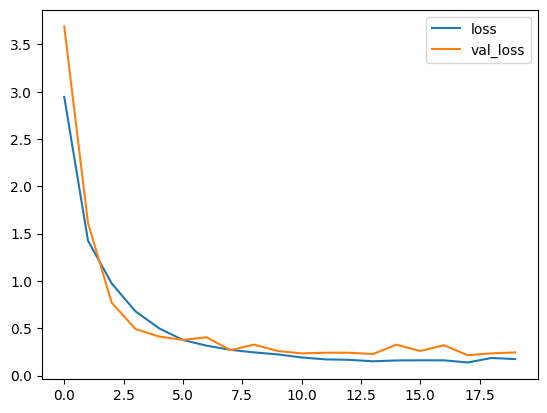

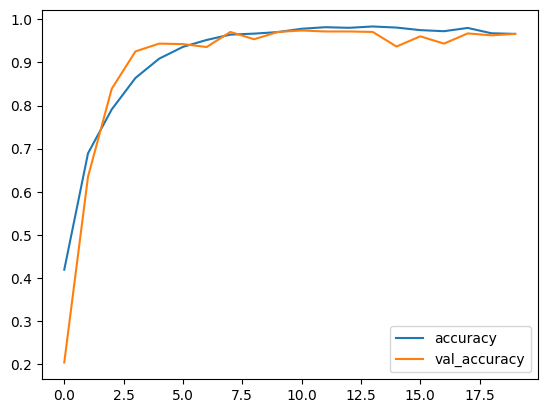

In [12]:
history=model.fit(train, epochs=20, validation_data=validate, callbacks=[early_stopping])

import pandas as pd
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['accuracy', 'val_accuracy']].plot();

In [13]:
test_loss, test_accuracy = model.evaluate(test)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

41/41 [==============================] - 4s 95ms/step - loss: 0.8948 - accuracy: 0.8517
Test Loss: 0.894781768321991
Test Accuracy: 0.8517080545425415


In [14]:
model.save('/content/drive/MyDrive/Deep_Learning/model_85_17.h5')